# 교차분석
* 2차원. y : 범주형 <=> x : 범주형
* 교차표, 분할표를 작성해서 분석함.
* 카이제곱분포를 이용
* 카이제곱분석 이라고도 함.

## 이론적 설명
* 카이제곱분석
    * 적합도 검정 : 특정한 분포를 따르는지 검정
    * 독립성 검정 : 분할표 상 변수 간의 연관성 검정
    * 동질성 검정 : 분할표 상 두 변수에 대해 모집단 비율이 같은가
* 독립성 / 동질성은 가설에서 차이가 나나, 검정 방법은 동일.

In [51]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import chisquare

## 적합도 검정
* 관측값이 특정 확률분포를 따르는지 보기
* ex. 주사위가 120번 던져졌을 때, 주사위가 균등하게 되어있는지 유의수준 5% 하에 검정

In [52]:
def stat_result(x):
    arr = list(x)
    for i in range(0, len(arr)):
        print(arr[i])

In [53]:
obs_freq = [22, 19, 26, 25, 17, 11]
exp_freq = [20, 20, 20, 20, 20, 20]

result = chisquare(obs_freq, f_exp=exp_freq)
result

Power_divergenceResult(statistic=7.8, pvalue=0.1676079313513126)

In [54]:
stat_result(result)

7.8
0.1676079313513126


## 독립성 검정
* 두 변수 간의 관계가 독립인지 아닌지 분석하기
* 독립이 아니라면 관련이 있다고 해석

In [55]:
obs = pd.DataFrame({'남' : [26, 20, 11], '여' : [10, 15, 18]})
obs.index = ['만족', '보통', '불만족']

from scipy.stats import chi2_contingency
chiresult = chi2_contingency(obs, correction = False)
stat_result(chiresult)

7.706091389035719
0.021215023459771897
2
[[20.52 15.48]
 [19.95 15.05]
 [16.53 12.47]]


## 동질성 검정
* 분할표 상 두 변수에 대해서 모집단 비율이 똑같은지 검정
* 동질성 검정 / 독립성 검정은 코드는 같으나, 가설이 다름

`H_0 : 남/녀 간의 찬성비율이 같다`

In [56]:
obs = pd.DataFrame({'남' : [25, 75], '여' : [45, 55]})
obs.index = ['만족', '반대']

from scipy.stats import chi2_contingency
chiresult = chi2_contingency(obs, correction = False)
stat_result(chiresult)

8.791208791208792
0.003026856189129367
1
[[35. 35.]
 [65. 65.]]


## 실습 : usedcars 데이터

In [57]:
# 데이터 불러들이기
car = pd.read_csv("../data/usedcars.csv", encoding='cp949')

In [58]:
# 교차표 생성
result = pd.crosstab(car.fuel, car.maker)
result

maker,GM대우,기아,르노삼성,쉐보레,쎄미시스코,아리아워크스루밴,오딧,제네시스,케이씨,현대
fuel,,,,,,,,,,
LPG,0,2,0,0,0,0,0,0,0,0
가솔린,1,11,1,2,0,0,0,9,0,18
디젤,3,8,1,1,0,1,1,0,1,9
전기,0,0,0,0,1,0,0,0,0,0


In [59]:
# H0 : maker와 fuel 변수는 연관성이 있다.

from scipy.stats import chi2_contingency
result1 = chi2_contingency(result)
stat_result(result1)

88.70873015873016
1.6965542576410755e-08
27
[[1.14285714e-01 6.00000000e-01 5.71428571e-02 8.57142857e-02
  2.85714286e-02 2.85714286e-02 2.85714286e-02 2.57142857e-01
  2.85714286e-02 7.71428571e-01]
 [2.40000000e+00 1.26000000e+01 1.20000000e+00 1.80000000e+00
  6.00000000e-01 6.00000000e-01 6.00000000e-01 5.40000000e+00
  6.00000000e-01 1.62000000e+01]
 [1.42857143e+00 7.50000000e+00 7.14285714e-01 1.07142857e+00
  3.57142857e-01 3.57142857e-01 3.57142857e-01 3.21428571e+00
  3.57142857e-01 9.64285714e+00]
 [5.71428571e-02 3.00000000e-01 2.85714286e-02 4.28571429e-02
  1.42857143e-02 1.42857143e-02 1.42857143e-02 1.28571429e-01
  1.42857143e-02 3.85714286e-01]]


In [65]:
# 결과에 0이 너무 많으므로, fisher exact 검정 활용
import scipy.stats as stats
print(obs.iloc[0:2, 0:2])

result_fisher = stats.fisher_exact(obs.iloc[0:2, 0:2], alternative='two-sided')
result_fisher

     남   여
만족  25  45
반대  75  55


(0.4074074074074074, 0.0046790480765882166)

# 상관분석
* 수치형 - 수치형
* 회귀분석과의 차이?
    * 상관분석 : 독립 / 종속 이라는 개념이 등장하지 않음.
    * 회귀분석 : 독립 / 종속 이라는 개념이 등장. (시간적 선후관계 등장)
* 보통 상관분석 -> 회귀분석 순서로 진행.
* 방향성을 체크하는 것이 목표

## 실습 : 초등학생 data

In [82]:
data = pd.read_excel("../data/초등학교3학년_남자.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   키       98 non-null     float64
 1   몸무게     98 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [91]:
data = pd.DataFrame(data)
data.columns = ['height', 'weight']
print(data.describe(), end="\n")

           height     weight
count   98.000000  98.000000
mean   132.130612  31.536735
std     12.395954   9.699361
min    110.900000  17.200000
25%    122.975000  24.150000
50%    131.150000  28.950000
75%    140.725000  39.575000
max    163.000000  56.700000


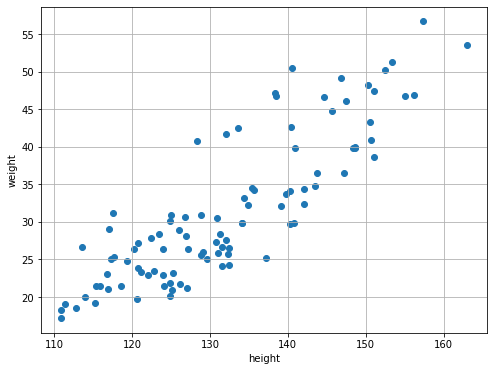

In [90]:
plt.figure(figsize=(8, 6))
plt.scatter(data['height'], data['weight'])
plt.grid(True)
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

In [96]:
# ho : rho = 0
pvalue = 0.05
corr = stats.pearsonr(data.height, data.weight)
print(corr)

if corr[1] < pvalue:
    print("reject H0")
else:
    print("failed to reject H0")

(0.8583011404409244, 1.4375440398437243e-29)
reject H0


## 실습 : iris - 붗꽃 data

In [106]:
import seaborn as sns
list = sns.get_dataset_names()
for name in list: print(name, end=' ')

anagrams anscombe attention brain_networks car_crashes diamonds dots dowjones exercise flights fmri geyser glue healthexp iris mpg penguins planets seaice taxis tips titanic anagrams anagrams anscombe anscombe attention attention brain_networks brain_networks car_crashes car_crashes diamonds diamonds dots dots dowjones dowjones exercise exercise flights flights fmri fmri geyser geyser glue glue healthexp healthexp iris iris mpg mpg penguins penguins planets planets seaice seaice taxis taxis tips tips titanic titanic anagrams anscombe attention brain_networks car_crashes diamonds dots dowjones exercise flights fmri geyser glue healthexp iris mpg penguins planets seaice taxis tips titanic 

In [105]:
iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

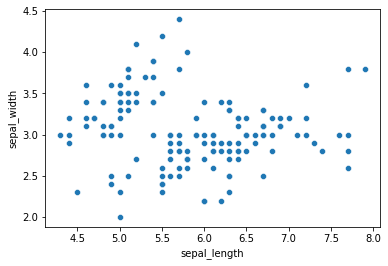

In [109]:
sns.scatterplot(data = iris, x = 'sepal_length', y = 'sepal_width')

[(4.0, 9.0), (1.0, 5.0)]

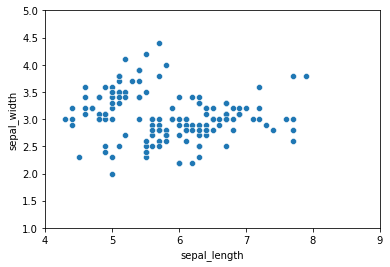

In [111]:
sns.scatterplot(data = iris, x = 'sepal_length', y = 'sepal_width').set(xlim = (4, 9), ylim = (1, 5))

In [112]:
iris[['sepal_length', 'sepal_width']].corr()

,sepal_length,sepal_width
sepal_length,1.00000,-0.11757
sepal_width,-0.11757,1.00000


In [113]:
round(iris[['sepal_length', 'sepal_width']].corr(), 2)

,sepal_length,sepal_width
sepal_length,1.00,-0.12
sepal_width,-0.12,1.00


In [114]:
print(round(iris.corr(), 2))

              sepal_length  sepal_width  petal_length  petal_width
sepal_length          1.00        -0.12          0.87         0.82
sepal_width          -0.12         1.00         -0.43        -0.37
petal_length          0.87        -0.43          1.00         0.96
petal_width           0.82        -0.37          0.96         1.00
